In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import platform
import pathlib

print('Python version:', platform.python_version())
print('Tensorflow version:', tf.__version__)
print('Keras version:', tf.keras.__version__)

Python version: 3.9.15
Tensorflow version: 2.18.0
Keras version: 3.7.0


In [2]:
model = tf.keras.applications.MobileNetV2()
print(model)

<Functional name=mobilenetv2_1.00_224, built=True>


In [3]:
model.summary()

Model: "mobilenetv2_1.00_224"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1 (Conv2D)      │ (None, 112, 112,  │        864 │ input_layer[0][0] │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bn_Conv1            │ (None, 112, 112,  │        128 │ Conv1[0][0]       │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1_relu (ReLU)   │ (None, 112, 112,  │          0 │ bn_Conv1[0][0]    │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        288 │ Conv1_relu[0][0]  │
│ (DepthwiseConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        128 │ expanded_conv_de… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │          0 │ expanded_conv_de… │
│ (ReLU)              │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │        512 │ expanded_conv_de… │
│ (Conv2D)            │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │         64 │ expanded_conv_pr… │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand      │ (None, 112, 112,  │      1,536 │ expanded_conv_pr… │
│ (Conv2D)            │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_BN   │ (None, 112, 112,  │        384 │ block_1_expand[0… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_relu │ (None, 112, 112,  │          0 │ block_1_expand_B… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_pad         │ (None, 113, 113,  │          0 │ block_1_expand_r… │
│ (ZeroPadding2D)     │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise   │ (None, 56, 56,    │        864 │ block_1_pad[0][0] │
│ (DepthwiseConv2D)   │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │        384 │ block_1_depthwis… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │          0 │ block_1_depthwis… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_project     │ (None, 56, 56,    │      2,304 │ block_1_depthwis

 Total params: 3,538,984 (13.50 MB)

 Trainable params: 3,504,872 (13.37 MB)

 Non-trainable params: 34,112 (133.25 KB)

In [10]:
!pip install graphviz


In [12]:
!pip uninstall pydot -y

Found existing installation: pydot 1.4.2
Uninstalling pydot-1.4.2:
  Successfully uninstalled pydot-1.4.2


In [13]:

!pip install pydot


  Using cached pydot-3.0.4-py3-none-any.whl.metadata (10 kB)
Using cached pydot-3.0.4-py3-none-any.whl (35 kB)


In [15]:
!pip install --upgrade pydot graphviz



  Attempting uninstall: graphviz
    Found existing installation: graphviz 0.20.1
    Uninstalling graphviz-0.20.1:
      Successfully uninstalled graphviz-0.20.1


In [16]:
import pydot


In [18]:
pip install pydot graphviz

Note: you may need to restart the kernel to use updated packages.


In [4]:
tf.keras.utils.plot_model(model, show_shapes=True, show_layer_names=True)

You must install graphviz (see instructions at https://graphviz.gitlab.io/download/) for `plot_model` to work.


In [8]:
INPUT_IMAGE_SIZE = model.input_shape[1]  # ✅ Correct way
print('INPUT_IMAGE_SIZE:', INPUT_IMAGE_SIZE)




INPUT_IMAGE_SIZE: 224


In [9]:
LABELS_URL = 'https://storage.googleapis.com/download.tensorflow.org/data/ImageNetLabels.txt'
labels_path = tf.keras.utils.get_file('ImageNetLabels.txt', LABELS_URL)
labels = np.array(
    open(labels_path).read().splitlines()
)[1:]

In [10]:
print('Labels shape:', labels.shape)

Labels shape: (1000,)


In [11]:

print(labels)

['tench' 'goldfish' 'great white shark' 'tiger shark' 'hammerhead'
 'electric ray' 'stingray' 'cock' 'hen' 'ostrich' 'brambling' 'goldfinch'
 'house finch' 'junco' 'indigo bunting' 'robin' 'bulbul' 'jay' 'magpie'
 'chickadee' 'water ouzel' 'kite' 'bald eagle' 'vulture' 'great grey owl'
 'European fire salamander' 'common newt' 'eft' 'spotted salamander'
 'axolotl' 'bullfrog' 'tree frog' 'tailed frog' 'loggerhead'
 'leatherback turtle' 'mud turtle' 'terrapin' 'box turtle' 'banded gecko'
 'common iguana' 'American chameleon' 'whiptail' 'agama' 'frilled lizard'
 'alligator lizard' 'Gila monster' 'green lizard' 'African chameleon'
 'Komodo dragon' 'African crocodile' 'American alligator' 'triceratops'
 'thunder snake' 'ringneck snake' 'hognose snake' 'green snake'
 'king snake' 'garter snake' 'water snake' 'vine snake' 'night snake'
 'boa constrictor' 'rock python' 'Indian cobra' 'green mamba' 'sea snake'
 'horned viper' 'diamondback' 'sidewinder' 'trilobite' 'harvestman'
 'scorpion' 'blac

In [12]:
def load_image(image_path):
    return tf.keras.preprocessing.image.load_img(
        image_path,
        target_size=[INPUT_IMAGE_SIZE, INPUT_IMAGE_SIZE]
    )

In [13]:
def image_to_array(image):
    return tf.keras.preprocessing.image.img_to_array(image, dtype=np.int32)

In [14]:
def display_image(image_np):
    plt.figure()
    plt.imshow(image_np)

In [17]:
import pathlib
import requests

# Define the URL and local save path
url = "https://storage.googleapis.com/download.tensorflow.org/data/ImageNetLabels.txt"
local_path = "ImageNetLabels.txt"

# Download the file
response = requests.get(url)
with open(local_path, "wb") as f:
    f.write(response.content)

print("Download complete:", local_path)


Download complete: ImageNetLabels.txt


In [25]:
TEST_IMAGES_DIR_PATH = pathlib.Path('C:/Users/Indhuma/Downloads/machine-learning-experiments-master/data')
TEST_IMAGE_PATHS = sorted(list(TEST_IMAGES_DIR_PATH.glob('*.jpg')))
TEST_IMAGE_PATHS

[WindowsPath('C:/Users/Indhuma/Downloads/machine-learning-experiments-master/data/banana.jpg'),
 WindowsPath('C:/Users/Indhuma/Downloads/machine-learning-experiments-master/data/city.jpg'),
 WindowsPath('C:/Users/Indhuma/Downloads/machine-learning-experiments-master/data/dogs.jpg'),
 WindowsPath('C:/Users/Indhuma/Downloads/machine-learning-experiments-master/data/ship.jpg'),
 WindowsPath('C:/Users/Indhuma/Downloads/machine-learning-experiments-master/data/street.jpg')]

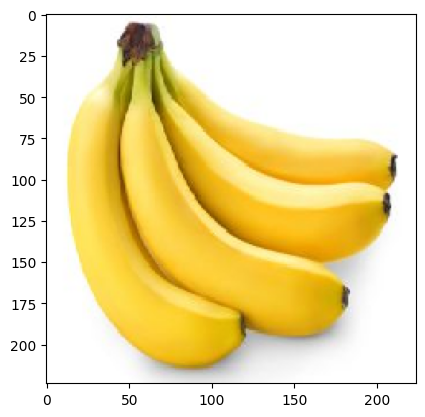

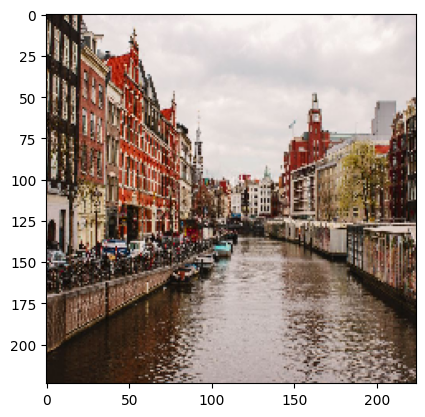

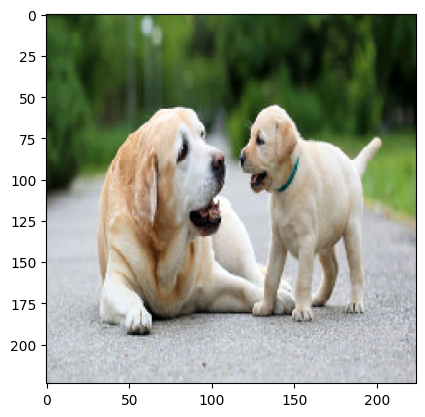

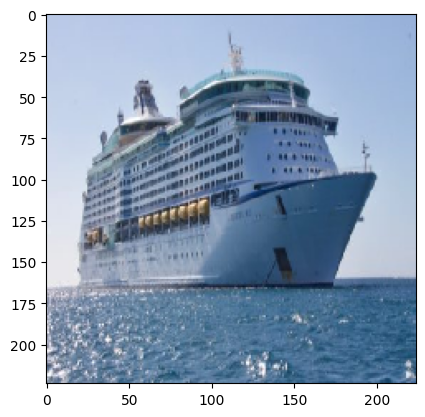

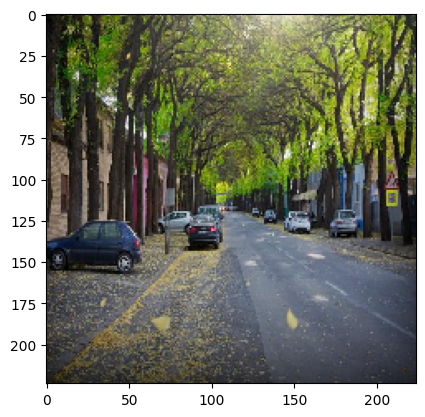

In [26]:
test_images = []
for image_path in TEST_IMAGE_PATHS:
    # <PIL.Image.Image image mode=RGB size=224x224 at 0x141247ED0>
    test_image = load_image(image_path)
    test_image_array = image_to_array(test_image)
    test_images.append(test_image_array)
    display_image(test_image_array)

In [27]:
print(test_images[1])

[[[ 35  26  21]
  [ 36  26  24]
  [ 31  23  20]
  ...
  [228 219 222]
  [228 219 222]
  [227 218 221]]

 [[ 31  23  21]
  [ 31  26  23]
  [ 29  24  20]
  ...
  [223 214 217]
  [219 210 213]
  [219 210 213]]

 [[ 36  26  25]
  [ 32  24  22]
  [ 26  25  20]
  ...
  [219 210 213]
  [216 207 210]
  [217 208 211]]

 ...

 [[ 31  24  18]
  [ 29  22  16]
  [ 29  22  16]
  ...
  [ 73  54  37]
  [116 100  85]
  [ 54  42  28]]

 [[ 29  22  16]
  [ 28  21  15]
  [ 29  22  16]
  ...
  [ 64  48  32]
  [ 44  30  17]
  [ 42  32  20]]

 [[ 31  24  18]
  [ 29  22  16]
  [ 29  22  16]
  ...
  [ 51  41  31]
  [ 55  42  33]
  [ 55  43  31]]]


In [28]:
def image_preprocess(image_array):
    return tf.keras.applications.mobilenet_v2.preprocess_input(
        image_array[tf.newaxis, ...]
    )

In [29]:
test_images_preprocessed = []
for test_image in test_images:
    test_image_preprocessed = image_preprocess(test_image)
    test_images_preprocessed.append(test_image_preprocessed)

In [30]:
print('Image shape before preprocessing:', test_images[0].shape)
print('Image shape after preprocessing:', test_images_preprocessed[0].shape)

Image shape before preprocessing: (224, 224, 3)
Image shape after preprocessing: (1, 224, 224, 3)


In [31]:
print(test_images_preprocessed[1])

[[[[-0.7254902  -0.79607844 -0.8352941 ]
   [-0.7176471  -0.79607844 -0.8117647 ]
   [-0.75686276 -0.81960785 -0.84313726]
   ...
   [ 0.7882353   0.7176471   0.7411765 ]
   [ 0.7882353   0.7176471   0.7411765 ]
   [ 0.78039217  0.70980394  0.73333335]]

  [[-0.75686276 -0.81960785 -0.8352941 ]
   [-0.75686276 -0.79607844 -0.81960785]
   [-0.77254903 -0.8117647  -0.84313726]
   ...
   [ 0.7490196   0.6784314   0.7019608 ]
   [ 0.7176471   0.64705884  0.67058825]
   [ 0.7176471   0.64705884  0.67058825]]

  [[-0.7176471  -0.79607844 -0.8039216 ]
   [-0.7490196  -0.8117647  -0.827451  ]
   [-0.79607844 -0.8039216  -0.84313726]
   ...
   [ 0.7176471   0.64705884  0.67058825]
   [ 0.69411767  0.62352943  0.64705884]
   [ 0.7019608   0.6313726   0.654902  ]]

  ...

  [[-0.75686276 -0.8117647  -0.85882354]
   [-0.77254903 -0.827451   -0.8745098 ]
   [-0.77254903 -0.827451   -0.8745098 ]
   ...
   [-0.42745095 -0.5764706  -0.70980394]
   [-0.09019607 -0.21568626 -0.3333333 ]
   [-0.5764706  

In [32]:
def get_tags(probs, labels, max_classes = 5, prob_threshold = 0.01):
    probs_mask = probs > prob_threshold
    probs_filtered = probs[probs_mask] * 100
    labels_filtered = labels[probs_mask]
    
    sorted_index = np.flip(np.argsort(probs_filtered))
    labels_filtered = labels_filtered[sorted_index][:max_classes]
    probs_filtered = probs_filtered[sorted_index][:max_classes].astype(np.int)
    
    tags = ''
    for i in range(0, len(labels_filtered)):
        tags = tags + labels_filtered[i] + ' (' + str(probs_filtered[i]) + '%), ' 

    return tags, labels_filtered, probs_filtered 

In [33]:
TEST_IMAGE_INDEX = 1

In [34]:
result = model(test_images_preprocessed[TEST_IMAGE_INDEX])

In [35]:
result.shape

TensorShape([1, 1000])

In [36]:
print(result)

tf.Tensor(
[[1.56292386e-04 6.37012854e-05 1.00261299e-04 1.68301165e-04
  1.77926995e-04 2.45230131e-05 2.37853994e-04 1.71144493e-04
  1.52976121e-04 1.58020732e-04 1.39709533e-04 8.19812412e-05
  2.52206548e-04 9.51585243e-05 6.31108051e-05 6.41061270e-05
  1.68946586e-04 4.55310656e-05 1.72612359e-04 3.03031877e-04
  5.57994499e-05 6.10912612e-05 4.75977577e-05 2.51572259e-04
  5.89301235e-05 1.31122928e-04 1.90039471e-04 6.38592697e-04
  1.77877708e-04 1.19491619e-04 9.42396073e-05 3.70819362e-05
  3.63760453e-04 1.37924988e-04 1.21562276e-04 1.03630751e-04
  1.64198311e-04 3.70620488e-04 4.80564668e-05 1.82936856e-04
  7.23608391e-05 2.46656302e-04 1.59770862e-04 7.84907752e-05
  3.62553488e-04 2.38568347e-04 7.17090297e-05 6.57488927e-05
  7.06841165e-05 4.97926194e-05 1.95694141e-04 3.25115798e-05
  3.84701299e-04 1.67768405e-04 3.04089499e-05 4.94181368e-05
  8.47511619e-05 2.85485236e-04 1.48533640e-04 3.58729339e-05
  1.80647112e-05 1.14057002e-04 2.33364171e-05 1.05907842e-

In [37]:
np_result = result.numpy()[0]

In [38]:
print(np_result)

[1.56292386e-04 6.37012854e-05 1.00261299e-04 1.68301165e-04
 1.77926995e-04 2.45230131e-05 2.37853994e-04 1.71144493e-04
 1.52976121e-04 1.58020732e-04 1.39709533e-04 8.19812412e-05
 2.52206548e-04 9.51585243e-05 6.31108051e-05 6.41061270e-05
 1.68946586e-04 4.55310656e-05 1.72612359e-04 3.03031877e-04
 5.57994499e-05 6.10912612e-05 4.75977577e-05 2.51572259e-04
 5.89301235e-05 1.31122928e-04 1.90039471e-04 6.38592697e-04
 1.77877708e-04 1.19491619e-04 9.42396073e-05 3.70819362e-05
 3.63760453e-04 1.37924988e-04 1.21562276e-04 1.03630751e-04
 1.64198311e-04 3.70620488e-04 4.80564668e-05 1.82936856e-04
 7.23608391e-05 2.46656302e-04 1.59770862e-04 7.84907752e-05
 3.62553488e-04 2.38568347e-04 7.17090297e-05 6.57488927e-05
 7.06841165e-05 4.97926194e-05 1.95694141e-04 3.25115798e-05
 3.84701299e-04 1.67768405e-04 3.04089499e-05 4.94181368e-05
 8.47511619e-05 2.85485236e-04 1.48533640e-04 3.58729339e-05
 1.80647112e-05 1.14057002e-04 2.33364171e-05 1.05907842e-04
 5.27347220e-05 6.187218

In [41]:
tags, labels_filtered, probs_filtered = get_tags(np_result, labels)
probs_filtered = probs_filtered[sorted_index][:max_classes].astype(int)  # ✅ Correct


print('probs_filtered:', probs_filtered)
print('labels_filtered:', labels_filtered)
print('tags:', tags)

AttributeError: module 'numpy' has no attribute 'int'.
`np.int` was a deprecated alias for the builtin `int`. To avoid this error in existing code, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
The aliases was originally deprecated in NumPy 1.20; for more details and guidance see the original release note at:
    https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

In [43]:
def get_tags(probs, labels, max_classes=5, prob_threshold=0.1):
    probs_filtered = probs[probs > prob_threshold]
    labels_filtered = labels[probs > prob_threshold]

    if len(probs_filtered) == 0:
        return "No Tags", [], []  # ✅ Return a default value if no tags exist

    sorted_index = np.flip(np.argsort(probs_filtered))
    labels_filtered = labels_filtered[sorted_index][:max_classes]
    probs_filtered = probs_filtered[sorted_index][:max_classes].astype(float)

    tags = ', '.join(labels_filtered)  # ✅ Create a string of tags
    return tags, labels_filtered, probs_filtered


probs_filtered: [0.4092702]
labels_filtered: ['dock']
tags: dock
Tags: dock


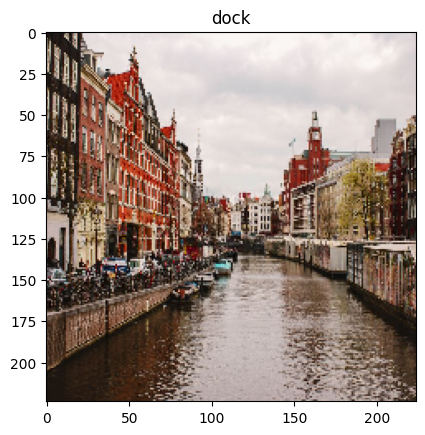

In [47]:
# Ensure get_tags() returns the correct values
tags, labels_filtered, probs_filtered = get_tags(np_result, labels)
print('probs_filtered:', probs_filtered)
print('labels_filtered:', labels_filtered)
print('tags:', tags)
print("Tags:", tags)  # Debugging: Print to check if tags exist

# Now, use tags in plt.title()
import matplotlib.pyplot as plt

plt.title(tags)  # ✅ Ensure tags is not empty
plt.imshow(test_images[TEST_IMAGE_INDEX])  # ✅ Ensure TEST_IMAGE_INDEX is defined
plt.show()
